In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("fivethirtyeight")

In [2]:
yf.pdr_override()
data = pdr.get_data_yahoo("BTC-USD", start="2016-01-01", end="2021-07-27")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,425.875000,432.920990,418.734985,430.566986,430.566986,45996600
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
...,...,...,...,...,...,...
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,21664706865


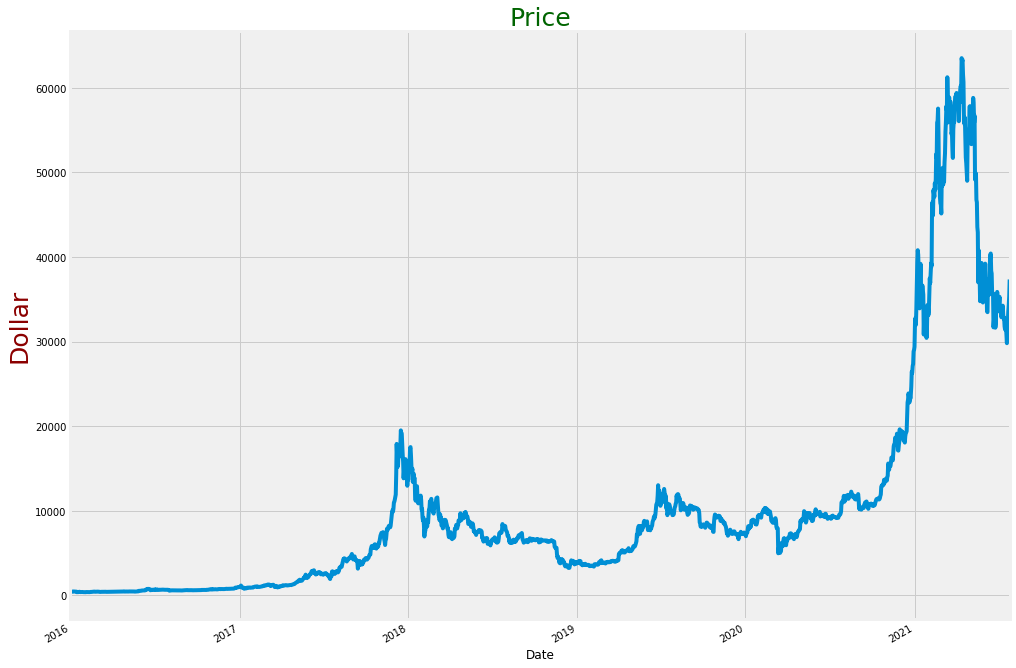

In [3]:
plt.title("Price", loc="center", color = "darkgreen", size = 25)
plt.ylabel("Dollar", color = "darkred", size = 25)
data["Close"].plot(figsize = (15,12))
plt.show()

In [4]:
# Bolinger band
period = 25 # 25 günlük
data["SMA"] = data["Close"].rolling(window = period).mean() # Basit Hareketli Ortalama (her günün kendine ait fiyatlandırması)
data["STD"] = data["Close"].rolling(window = period).std() # Standart sapma
# Bolinger alt nokta ve üst noktanın belirlenmesi;
data["Up"] = data["SMA"] + (data["STD"] * 2)
data["Down"] = data["SMA"] - (data["STD"] * 2)

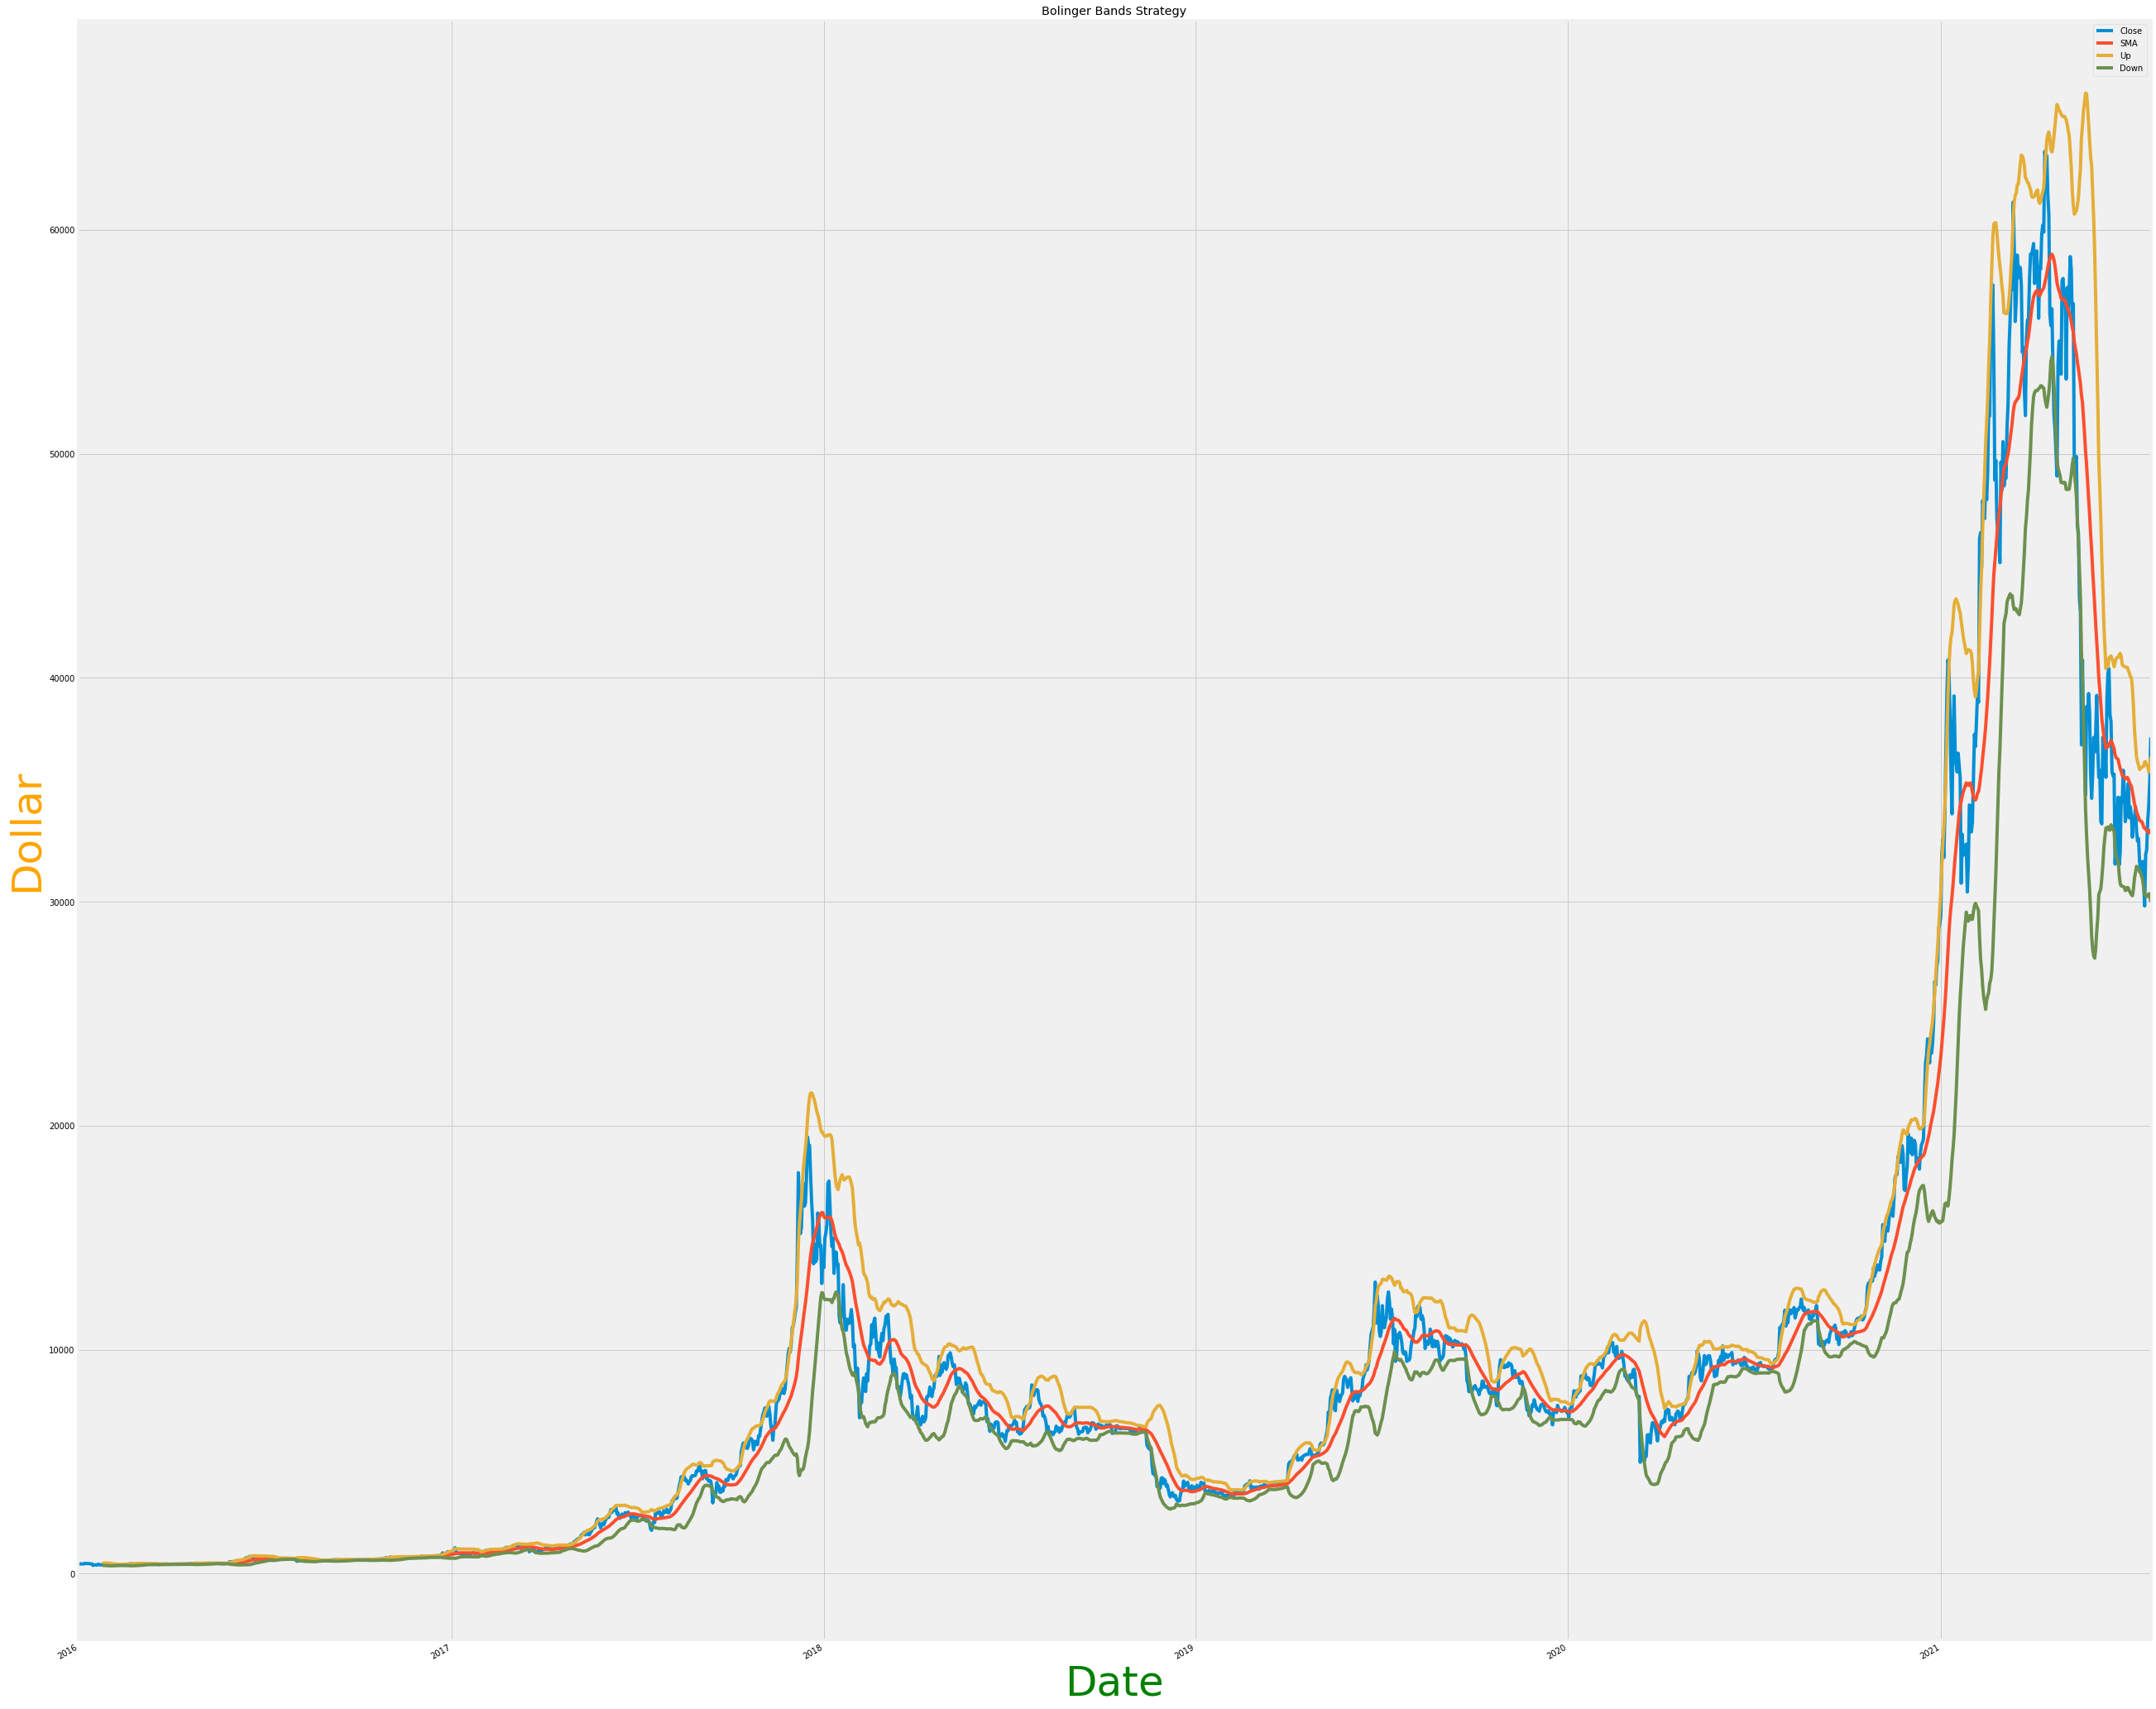

In [5]:
column_list = ["Close", "SMA", "Up", "Down"]
data[column_list].plot(figsize = (40,40))
plt.title("Bolinger Bands Strategy")
plt.ylabel("Dollar",color = "orange",size=50)
plt.xlabel("Date",color = "green",size=50)
plt.savefig('bitcoin.png')
plt.show()

In [6]:
data # period 25 günlük alındığından ilk 25 gün NaN değer alıyor

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Up,Down
Date,,,,,,,,,,
2015-12-31,425.875000,432.920990,418.734985,430.566986,430.566986,45996600,NaN,NaN,NaN,NaN
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,NaN,NaN,NaN,NaN
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,NaN,NaN,NaN,NaN
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,NaN,NaN,NaN,NaN
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518,33172.096250,1472.959874,36118.015997,30226.176503
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192,33137.984844,1452.239265,36042.463375,30233.506313
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,21664706865,33074.971563,1360.112101,35795.195765,30354.747360


In [7]:
new_data = data[period-1:]
new_data

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Up,Down
Date,,,,,,,,,,
2016-01-24,388.101990,405.484985,387.510010,402.971008,402.971008,54824800,419.244401,26.988585,473.221570,365.267231
2016-01-25,402.316986,402.316986,388.553986,391.726013,391.726013,59062400,417.690762,27.424081,472.538923,362.842601
2016-01-26,392.002014,397.765991,390.575012,392.153015,392.153015,58147000,416.003522,27.654064,471.311649,360.695394
2016-01-27,392.444000,396.842987,391.782013,394.971985,394.971985,47424400,414.464882,27.713650,469.892181,359.037582
2016-01-28,395.145996,395.502014,379.734985,380.289001,380.289001,59247900,412.476002,28.328822,469.133646,355.818358
...,...,...,...,...,...,...,...,...,...,...
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518,33172.096250,1472.959874,36118.015997,30226.176503
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192,33137.984844,1452.239265,36042.463375,30233.506313
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,21664706865,33074.971563,1360.112101,35795.195765,30354.747360


In [8]:
def signal(newdata):
    
    buy = []
    sell = []
    
    for i in range(len(newdata["Close"])):
        
        if newdata["Close"][i] < newdata["Down"][i]: # Kapanış fiyatları bolinger bandin aşağısında olduğunda alım bölgesi
            buy.append(newdata["Close"][i])
            sell.append(np.nan)
            
        elif newdata["Close"][i] > newdata["Up"][i]:
            buy.append(np.nan)
            sell.append(newdata["Close"][i])
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return(buy, sell)

In [9]:
new_data["Buy"] = signal(new_data)[0]
new_data["Sell"] = signal(new_data)[1]
new_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Up,Down,Buy,Sell
Date,,,,,,,,,,,,
2016-01-24,388.101990,405.484985,387.510010,402.971008,402.971008,54824800,419.244401,26.988585,473.221570,365.267231,NaN,NaN
2016-01-25,402.316986,402.316986,388.553986,391.726013,391.726013,59062400,417.690762,27.424081,472.538923,362.842601,NaN,NaN
2016-01-26,392.002014,397.765991,390.575012,392.153015,392.153015,58147000,416.003522,27.654064,471.311649,360.695394,NaN,NaN
2016-01-27,392.444000,396.842987,391.782013,394.971985,394.971985,47424400,414.464882,27.713650,469.892181,359.037582,NaN,NaN
2016-01-28,395.145996,395.502014,379.734985,380.289001,380.289001,59247900,412.476002,28.328822,469.133646,355.818358,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518,33172.096250,1472.959874,36118.015997,30226.176503,NaN,NaN
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192,33137.984844,1452.239265,36042.463375,30233.506313,NaN,NaN
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,21664706865,33074.971563,1360.112101,35795.195765,30354.747360,NaN,NaN


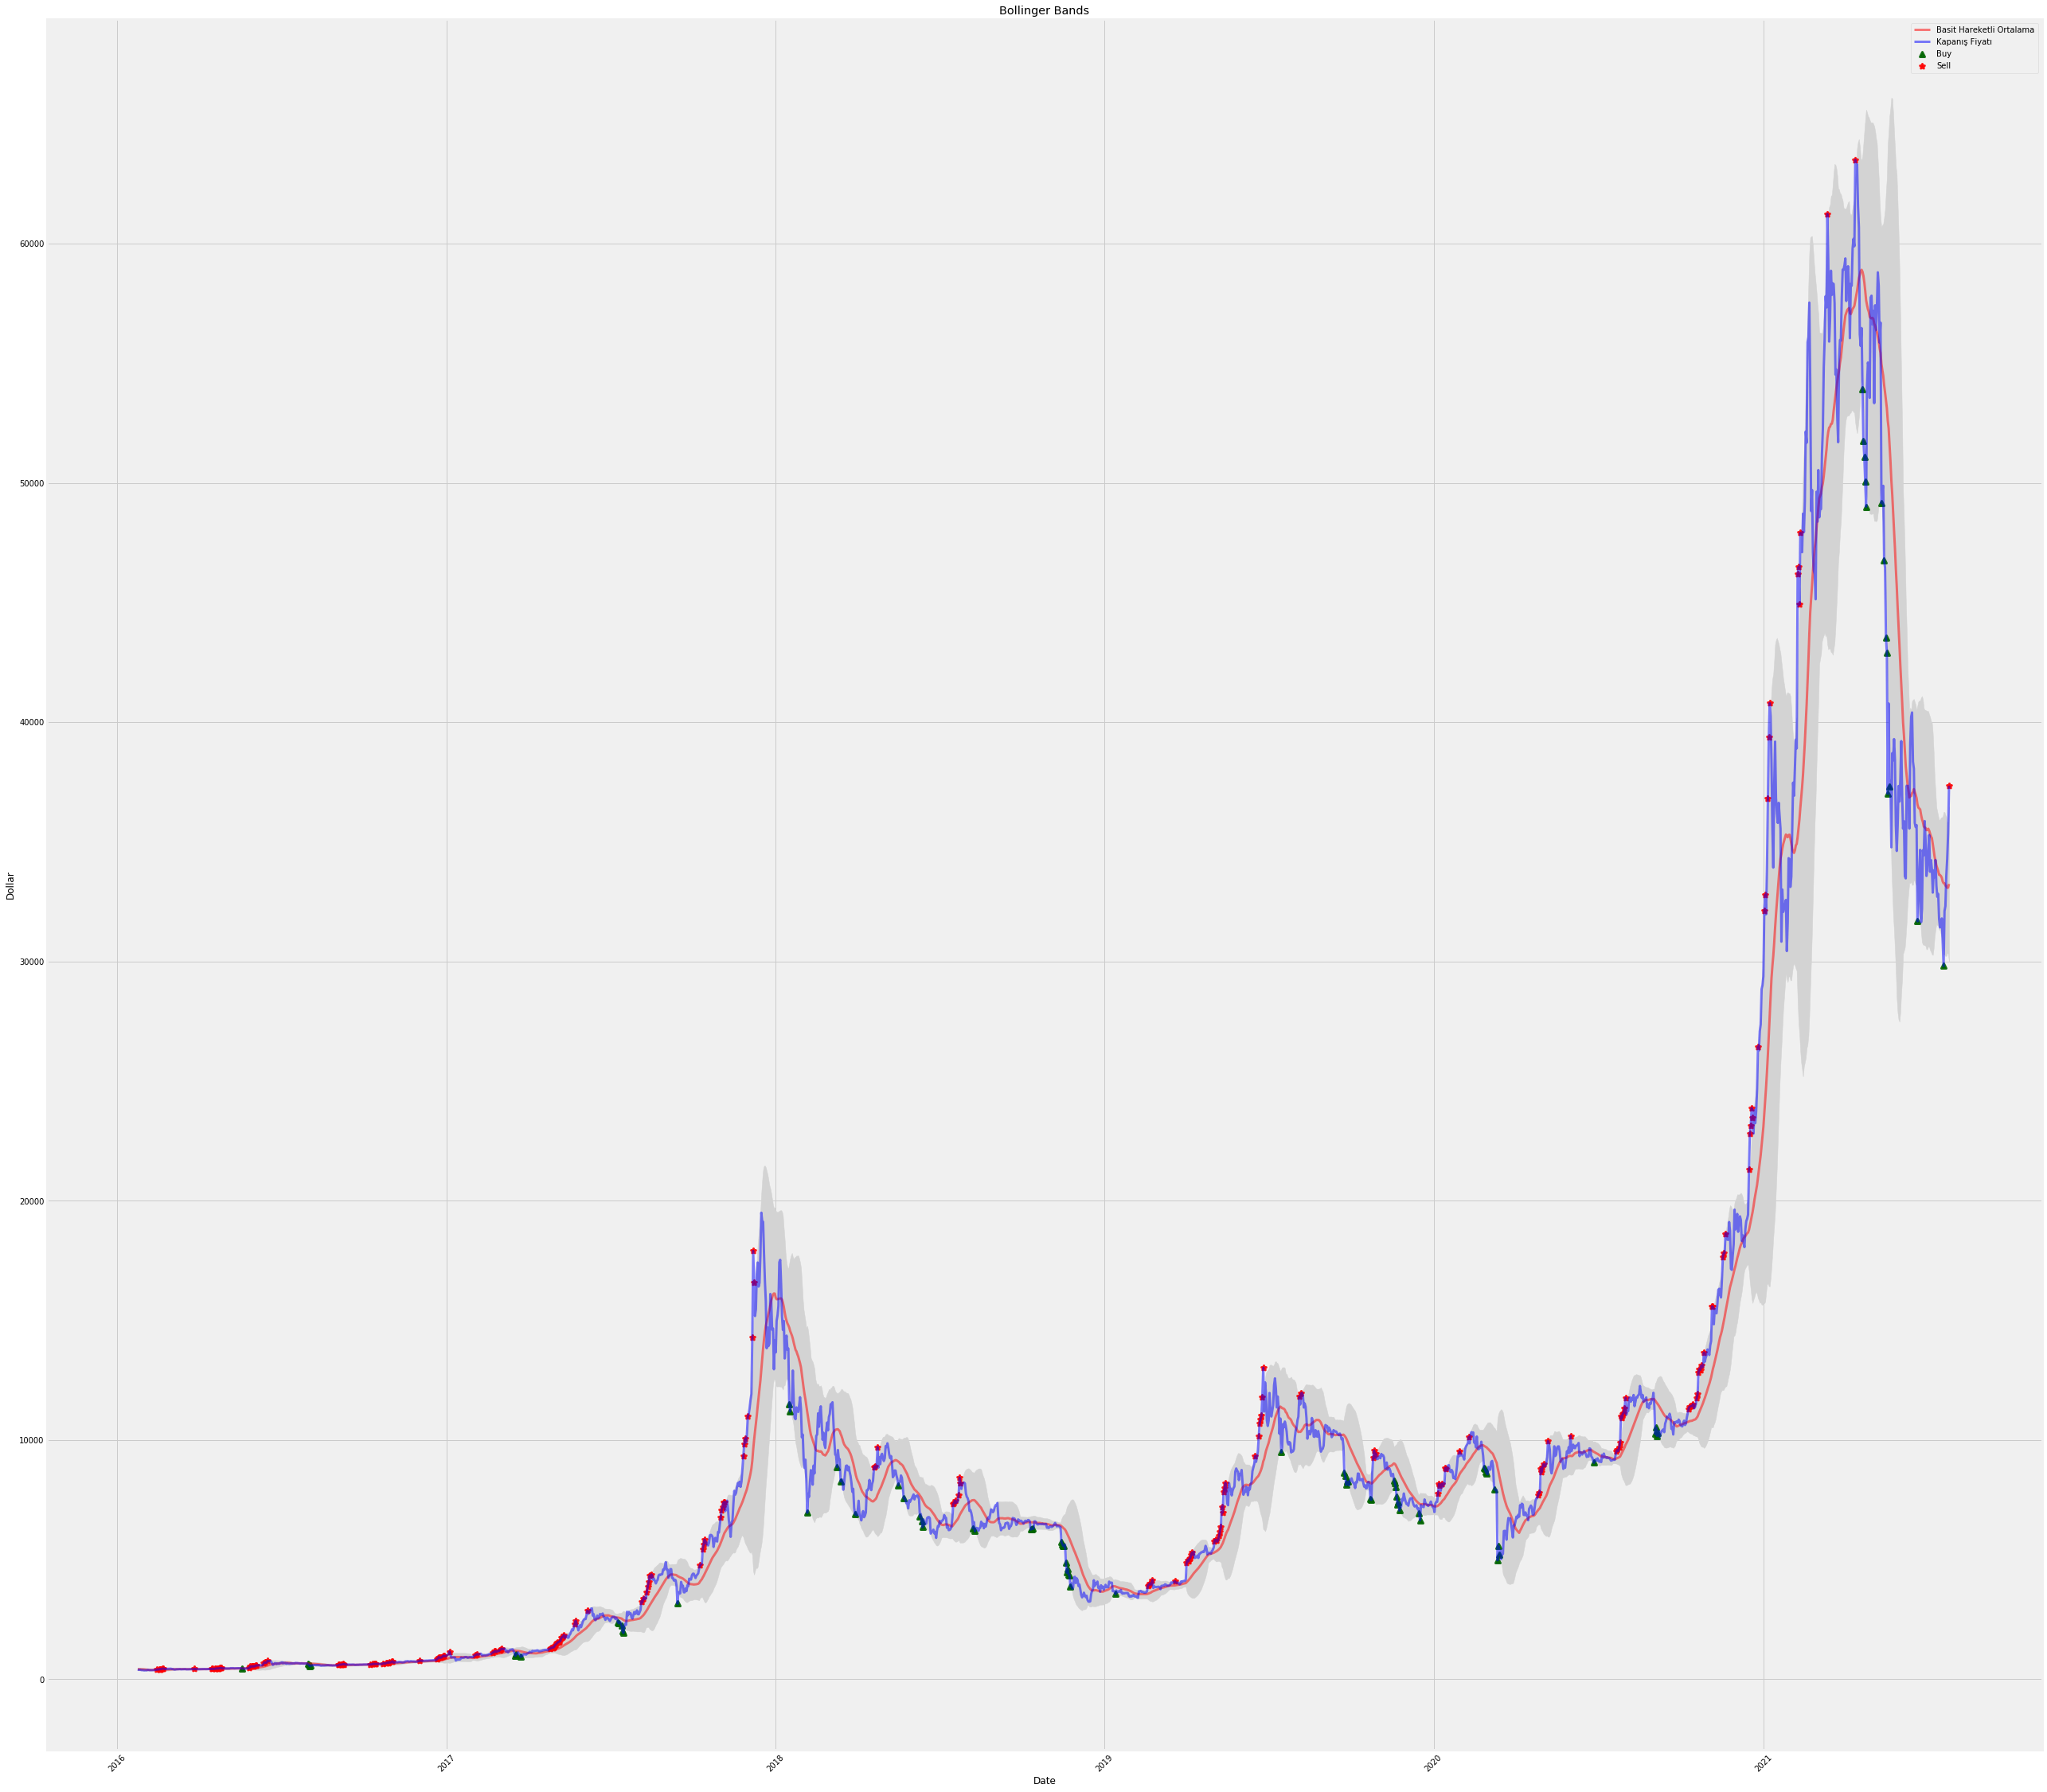

In [10]:
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1)
x_axis = new_data.index
ax.fill_between(x_axis, new_data["Up"], new_data["Down"], color = "lightgray") # Bolinger bandı arasındaki renk
ax.plot(x_axis, new_data["SMA"], color = "red", lw = 3, label = "Basit Hareketli Ortalama", alpha = 0.5)
ax.plot(x_axis, new_data["Close"], color = "blue", lw = 3, label = "Kapanış Fiyatı", alpha = 0.5)

ax.scatter(x_axis, new_data["Buy"], color = "darkgreen", lw = 3, marker = "^", label = "Buy", alpha = 0.9) # Alım noktalarının gösterilmesi
ax.scatter(x_axis, new_data["Sell"], color = "red", lw = 3, marker = "*", label = "Sell", alpha = 0.9) # Satım noktalarının gösterilmesi

ax.set_title("Bollinger Bands")
ax.set_ylabel("Dollar")
ax.set_xlabel("Date")
plt.xticks(rotation = 45)

plt.savefig('bitcoin2.png')
ax.legend()
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
data = data[["Close"]]
data

,Close
Date,
2015-12-31,430.566986
2016-01-01,434.334015
2016-01-02,433.437988
2016-01-03,430.010986
2016-01-04,433.091003
...,...
2021-07-22,32313.105469
2021-07-23,33581.550781
2021-07-24,34292.445312


In [13]:
# Eldeki verilerin 20 gün kaydırıp var olan sonuçları tahmin etmeye çalışığ karşılaştırılması
future_day = 20
data["prediction"] = data[["Close"]].shift(-future_day)
data[-25:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,prediction
Date,,
2021-07-02,33897.046875,32313.105469
2021-07-03,34668.546875,33581.550781
2021-07-04,35287.781250,34292.445312
2021-07-05,33746.003906,35350.187500
2021-07-06,34235.195312,37337.535156
2021-07-07,33855.328125,NaN
2021-07-08,32877.371094,NaN
2021-07-09,33798.011719,NaN
2021-07-10,33520.519531,NaN


In [14]:
# X = gelecekti fiyat tahminleri yaptırmak için numpy arraylarine çevirilmesi
x = np.array(data.drop("prediction", 1))[:-future_day]
print(x)

[[  430.56698608]
 [  434.33401489]
 [  433.43798828]
 ...
 [35287.78125   ]
 [33746.00390625]
 [34235.1953125 ]]


In [15]:
y = np.array(data["prediction"])[:-future_day]
print(y)

[  420.23001099   410.26199341   382.49200439 ... 34292.4453125
 35350.1875     37337.53515625]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 25)

In [17]:
# Desicision Tree ve Linear Regression'a göre aytı ayrı yapılacak

In [18]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [19]:
x_future = data.drop(["prediction"], 1)[-future_day:]
x_future = x_future.tail(future_day)
x_future = np.array(x_future)
x_future

array([[33855.328125  ],
       [32877.37109375],
       [33798.01171875],
       [33520.51953125],
       [34240.1875    ],
       [33155.84765625],
       [32702.02539062],
       [32822.34765625],
       [31780.73046875],
       [31421.5390625 ],
       [31533.06835938],
       [31796.81054688],
       [30817.83203125],
       [29807.34765625],
       [32110.69335938],
       [32313.10546875],
       [33581.55078125],
       [34292.4453125 ],
       [35350.1875    ],
       [37337.53515625]])

In [31]:
tree_predict = tree.predict(x_future)
lr_predict = lr.predict(x_future)
print("Tree Prediction =\n", tree_predict, "\n\n", "Linear Prediction =\n", lr_predict)

Tree Prediction =
 [32313.10546875 32067.64257812 35350.1875     34649.64453125
 37337.53515625 56099.51953125 32067.64257812 32067.64257812
 34240.1875     31780.73046875 31780.73046875 34240.1875
 44918.18359375 30825.69921875 33005.76171875 47105.515625
 32110.69335938 55888.1328125  34292.4453125  33572.1171875 ] 

 Linear Prediction =
 [33643.8840712  32687.16663706 33587.81248178 33316.3469622
 34020.38494188 32959.59515266 32515.62915042 32633.33821694
 31614.34321906 31262.95285162 31372.05991802 31630.07406469
 30672.35733111 29683.81899293 31937.13986553 32135.15592118
 33376.05271515 34071.50780177 35106.27759151 37050.46336826]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


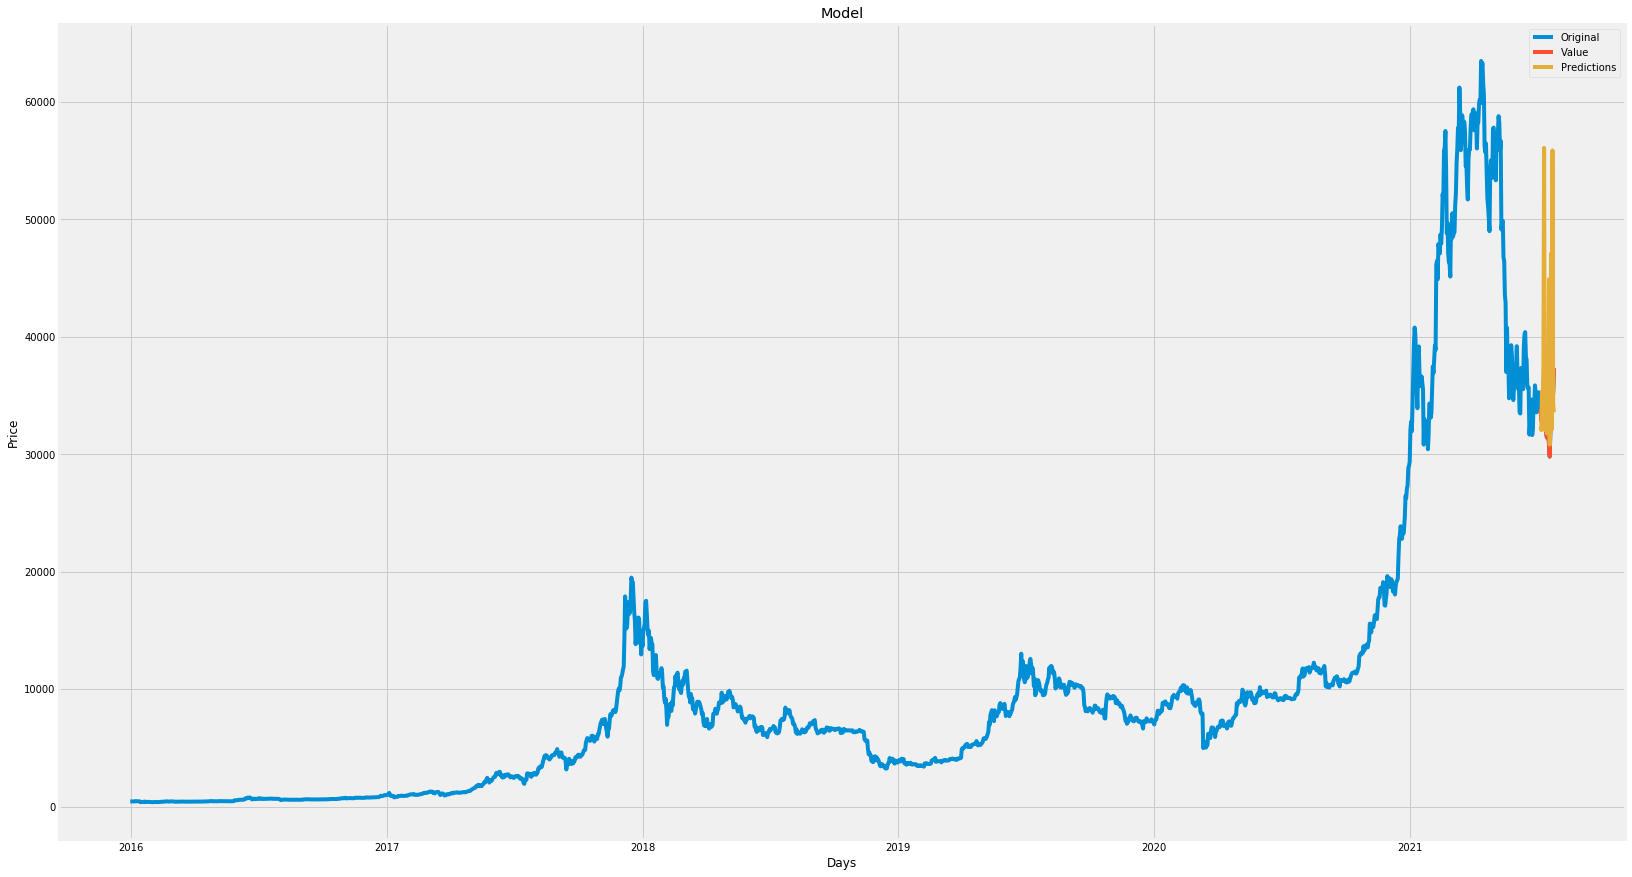

In [34]:
predictions = tree_predict

valid = data[x.shape[0]:]
valid["predictions"] = predictions
plt.figure(figsize = (25,15))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(data["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Original","Value","Predictions"])
plt.savefig('bitcoin_tree.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


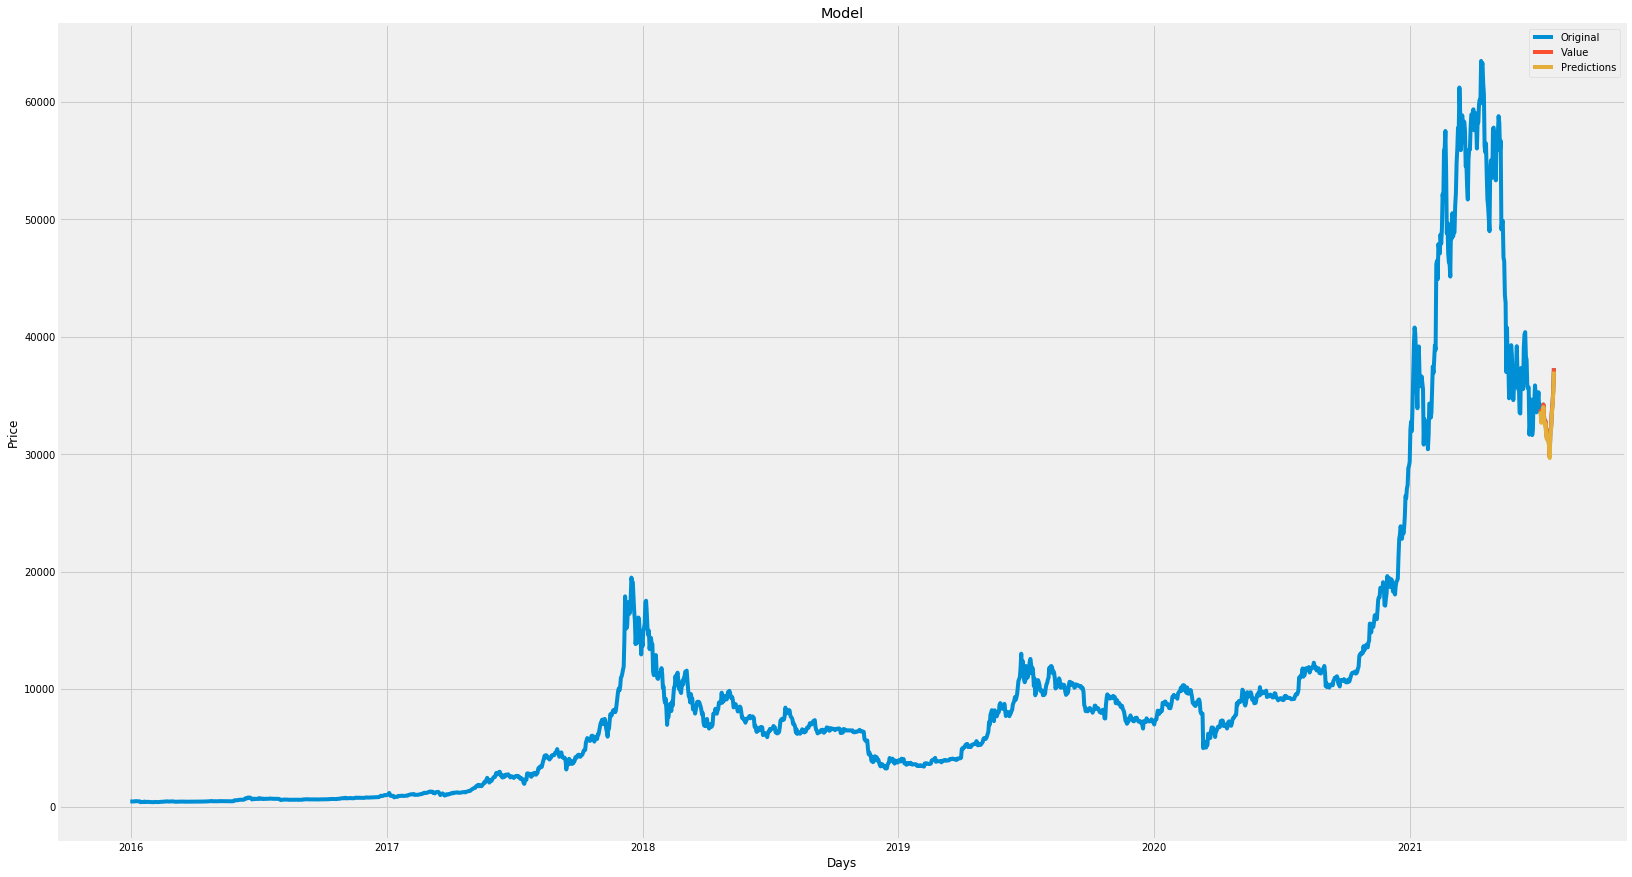

In [35]:
predictions = lr_predict

valid = data[x.shape[0]:]
valid["predictions"] = predictions
plt.figure(figsize = (25,15))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Price")
plt.plot(data["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Original","Value","Predictions"])
plt.savefig('bitcoin_lr.png')
plt.show()